# Import Libraries

In [31]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from imblearn.over_sampling import SMOTE

# Reading Data
#### 10% data to perform analysis

In [8]:
# Load Dataset
data = pd.read_excel('data/a1_Dataset_10Percent.xlsx')
data.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,8415498,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,12107603,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,14400995,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,28724674,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0


# EDA

In [9]:
data.shape

(22223, 11)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemClusterGroup  21549 non-null  object 
 4   DemGender        19711 non-null  object 
 5   DemReg           21758 non-null  object 
 6   DemTVReg         21758 non-null  object 
 7   LoyalClass       22223 non-null  object 
 8   LoyalSpend       22223 non-null  float64
 9   LoyalTime        21942 non-null  float64
 10  TargetBuy        22223 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.9+ MB


In [11]:
# checking for missing values
data.isnull().sum()

ID                    0
DemAffl            1085
DemAge             1508
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
LoyalClass            0
LoyalSpend            0
LoyalTime           281
TargetBuy             0
dtype: int64

<Axes: title={'center': 'LoyalSpend Distribution'}, ylabel='Frequency'>

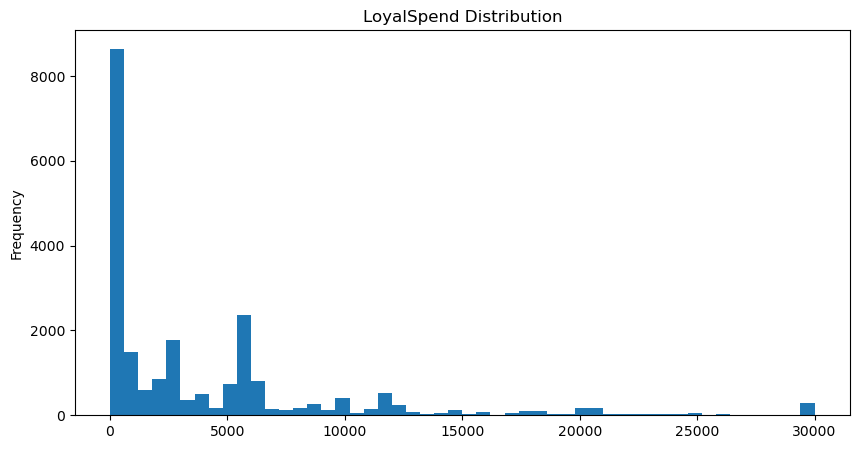

In [106]:
# Analyze purchase patterns and demographic trends.


data['LoyalSpend'].clip(upper=30000).plot(kind='hist', bins=50, figsize=(10, 5), title='LoyalSpend Distribution')




# Data Pre-Processing

In [14]:
# dropping Id column
data.drop('ID', axis=1, inplace=True)
data.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0


## Imputing MIssing Values

In [16]:
# filling missing values with mean for continuous and mode for categorical using for loop to iterate through columns
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].mean())


In [17]:
data.isnull().sum()


DemAffl            0
DemAge             0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
LoyalClass         0
LoyalSpend         0
LoyalTime          0
TargetBuy          0
dtype: int64

In [18]:
data

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.000000,53.797152,C,F,South East,London,Tin,0.01,5.00000,0
1,15.000000,53.797152,C,M,South East,London,Gold,8000.00,5.00000,1
2,8.711893,53.797152,C,M,Midlands,East,Tin,0.01,6.56467,1
3,8.000000,28.000000,C,F,South East,London,Tin,0.01,6.56467,1
4,14.000000,67.000000,C,F,South East,London,Tin,0.01,7.00000,0
...,...,...,...,...,...,...,...,...,...,...
22218,13.000000,49.000000,B,M,South East,London,Silver,500.00,9.00000,0
22219,13.000000,65.000000,B,F,South East,London,Silver,1500.00,5.00000,0
22220,15.000000,73.000000,D,U,South East,S & S East,Gold,6053.06,12.00000,0
22221,9.000000,70.000000,B,F,North,Yorkshire,Gold,6000.00,5.00000,0


## Caoverting Categorical to Numeric

In [19]:
# Convertign categorical columns to numberical columns, we are using label encoding here
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])
        

In [20]:
data.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.000000,53.797152,2,0,3,3,3,0.01,5.00000,0
1,15.000000,53.797152,2,1,3,3,0,8000.00,5.00000,1
2,8.711893,53.797152,2,1,0,2,3,0.01,6.56467,1
3,8.000000,28.000000,2,0,3,3,3,0.01,6.56467,1
4,14.000000,67.000000,2,0,3,3,3,0.01,7.00000,0


## Checking for Multi collinearity

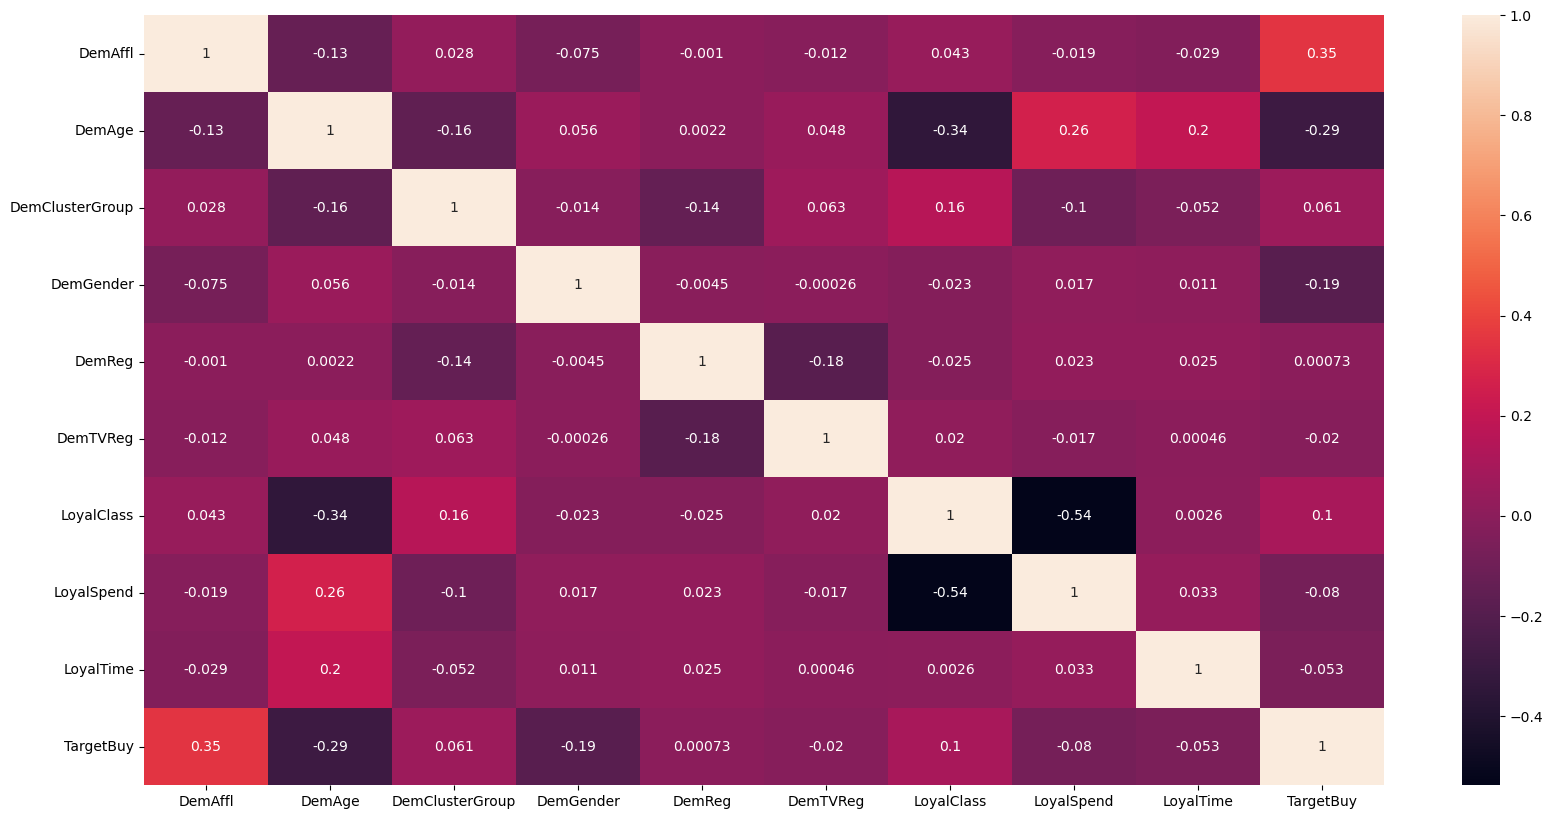

In [21]:
# Checking for multicollinearity
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [23]:
# Calculating VIF values of each column and displaying them
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                            for i in range(len(data.columns))]
print(vif_data)


           feature        VIF
0          DemAffl   7.616927
1           DemAge  11.246294
2  DemClusterGroup   3.673967
3        DemGender   1.469272
4           DemReg   2.479680
5         DemTVReg   3.756143
6       LoyalClass   3.869334
7       LoyalSpend   1.863827
8        LoyalTime   3.153924
9        TargetBuy   1.644037


## Splitting Data 

In [27]:
## Splitting Data into Train and test in the ration 8:2

X = data.drop('TargetBuy', axis=1)
y = data['TargetBuy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking for class imbalance
data['TargetBuy'].value_counts(normalize=True)


TargetBuy
0    0.752284
1    0.247716
Name: proportion, dtype: float64

# Modelling

In [33]:
# Building a logistic regression model

#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      3357
           1       0.70      0.32      0.44      1088

    accuracy                           0.80      4445
   macro avg       0.76      0.64      0.66      4445
weighted avg       0.79      0.80      0.77      4445

[[3211  146]
 [ 742  346]]
0.8002249718785152


c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
# Building a Random Forest regression model for binary classification
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predicting on test data
y_pred = rf_model.predict(X_test)

# Checking the accuracy of the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# acuracy score
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3357
           1       0.62      0.41      0.49      1088

    accuracy                           0.79      4445
   macro avg       0.72      0.66      0.68      4445
weighted avg       0.78      0.79      0.78      4445

[[3079  278]
 [ 639  449]]
0.7937007874015748


In [34]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      3357
           1       0.42      0.47      0.44      1088

    accuracy                           0.71      4445
   macro avg       0.62      0.63      0.62      4445
weighted avg       0.72      0.71      0.72      4445

[[2658  699]
 [ 581  507]]
0.7120359955005624


In [35]:
# Xgboost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3357
           1       0.62      0.42      0.50      1088

    accuracy                           0.80      4445
   macro avg       0.73      0.67      0.69      4445
weighted avg       0.78      0.80      0.78      4445

[[3077  280]
 [ 629  459]]
0.7955005624296962


In [38]:
# Hyperparameter tuning for XGBoost classifier

from sklearn.model_selection import RandomizedSearchCV

params = {

    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'learning_rate': [0.01,0.05, 0.1, 0.15, 0.20, 0.25, 0.30],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)


random_search.fit(X_train, y_train)

random_search.best_params_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'n_estimators': 400,
 'min_child_weight': 7,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [39]:
xgb = XGBClassifier(**random_search.best_params_)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3357
           1       0.66      0.43      0.52      1088

    accuracy                           0.81      4445
   macro avg       0.75      0.68      0.70      4445
weighted avg       0.79      0.81      0.79      4445

[[3117  240]
 [ 623  465]]
0.8058492688413949


In [42]:
X_train

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime
19882,6.0,71.000000,2,0,3,3,3,0.01,8.0
11263,10.0,46.000000,5,1,0,2,3,0.01,5.0
6271,7.0,72.000000,2,0,3,8,1,26053.35,8.0
8300,6.0,50.000000,2,1,3,8,3,0.01,5.0
18799,5.0,43.000000,3,1,3,3,3,0.01,8.0
...,...,...,...,...,...,...,...,...,...
11964,5.0,67.000000,5,0,1,12,0,6000.00,5.0
21575,9.0,29.000000,3,1,0,4,3,0.01,4.0
5390,6.0,53.797152,5,0,0,2,2,420.00,7.0
860,6.0,78.000000,2,0,3,8,0,6827.60,6.0


In [43]:
# Deep Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(32, input_dim=9, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=10)

y_pred = model.predict(X_test)

y_pred = [1 if y>=0.5 else 0 for y in y_pred]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


Epoch 1/100


1778/1778 [==============================] - 3s 1ms/step - loss: 1.9304 - accuracy: 0.7427
Epoch 2/100
1778/1778 [==============================] - 2s 1ms/step - loss: 0.5559 - accuracy: 0.7706
Epoch 3/100
1778/1778 [==============================] - 2s 1ms/step - loss: 0.5289 - accuracy: 0.7752
Epoch 4/100
1778/1778 [==============================] - 2s 1ms/step - loss: 0.5240 - accuracy: 0.7722
Epoch 5/100
1778/1778 [==============================] - 2s 1ms/step - loss: 0.5172 - accuracy: 0.7757
Epoch 6/100
1778/1778 [==============================] - 2s 1ms/step - loss: 0.5152 - accuracy: 0.7750
Epoch 7/100
1778/1778 [==============================] - 2s 1ms/step - loss: 0.5154 - accuracy: 0.7767
Epoch 8/100
1778/1778 [==============================] - 2s 1ms/step - loss: 0.5437 - accuracy: 0.7743
Epoch 9/100
1778/1778 [==============================] - 2s 1ms/step - loss: 0.5129 - accuracy: 0.7785
Epoch 10/100
1778/1778 [==============================] - 2s 1ms/step -

In [60]:
# Creating a dataframe to compare all the models, getting the models performance from the models objects, and storing them in a list
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'DNN']
accuracy = [accuracy_score(y_test, logreg.predict(X_test)),
             accuracy_score(y_test, 
[1 if y>=0.5 else 0 for y in rf_model.predict(X_test)]), 
             accuracy_score(y_test, dtree.predict(X_test)), 
             accuracy_score(y_test, xgb.predict(X_test)), 
             accuracy_score(y_test, 
[1 if y>=0.5 else 0 for y in model.predict(X_test)])]

model_comparison = pd.DataFrame({'models': models, 'accuracy': accuracy})
model_comparison

139/139 [==============================] - 0s 888us/step


,models,accuracy
0,Logistic Regression,0.800225
1,Random Forest,0.793701
2,Decision Tree,0.712036
3,XGBoost,0.805849
4,DNN,0.802025


In [61]:
# Exporting XGBoost classifier for later use in prediction

import joblib
joblib.dump(xgb, 'xgb_model.pkl')


['xgb_model.pkl']

In [82]:
#ccombining test set and test set prediction as probability into a df

test_set = pd.concat([X_test, y_test], axis=1)
test_set['predicted'] = xgb.predict(X_test)
test_set['probability'] = xgb.predict_proba(X_test)[:,1]

test_set.to_csv('data/test_set.csv', index=False)



In [83]:
test_set

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy,predicted,probability
1891,4.000000,53.797152,4,0,3,8,0,6107.64,6.0,0,0,0.073624
7558,8.000000,62.000000,0,0,3,3,0,8864.21,19.0,0,0,0.184132
5186,7.000000,64.000000,2,0,2,0,0,15000.00,2.0,0,0,0.064003
7751,2.000000,41.000000,3,0,0,4,3,0.01,8.0,0,0,0.070220
8295,20.000000,38.000000,3,0,0,2,2,0.02,9.0,1,1,0.994404
...,...,...,...,...,...,...,...,...,...,...,...,...
15687,12.000000,57.000000,2,1,1,7,0,6600.00,11.0,0,0,0.095761
15645,10.000000,70.000000,5,1,1,12,2,4000.00,11.0,0,0,0.148620
1586,5.000000,70.000000,1,0,0,4,0,12000.00,5.0,0,0,0.093598
6,7.000000,41.000000,2,0,3,3,3,0.01,7.0,0,0,0.328560


In [85]:
# Applying Decile methodology to the test set, sort the probability column in descending order and then divide the data into 10 equal parts
# give low decile to high probability values and high decile to low probability values,  1 to 10
# deciles should be from 1 to 10, and low decile number to high probabiity

test_set['Decile'] = pd.qcut(test_set['probability'], 10, labels=range(10, 0, -1))

test_set.sort_values('probability', ascending=False)


,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy,predicted,probability,Decile
20169,26.0,30.0,5,0,3,3,2,1060.00,5.0,1,1,0.996287,1
8678,21.0,32.0,4,0,3,3,3,0.01,6.0,1,1,0.996202,1
17487,26.0,39.0,3,0,0,2,3,0.01,5.0,1,1,0.995854,1
8020,21.0,32.0,5,0,3,3,3,0.01,4.0,1,1,0.995260,1
8670,20.0,31.0,1,0,0,2,2,1000.00,5.0,1,1,0.995026,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,1.0,45.0,2,1,0,4,2,3000.00,8.0,0,0,0.003787,10
19027,4.0,53.0,1,2,1,7,2,1000.00,33.0,0,0,0.003559,10
6781,6.0,45.0,4,2,2,1,2,2000.00,1.0,0,0,0.002998,10
1443,8.0,45.0,2,2,0,10,1,30000.00,2.0,0,0,0.002769,10


In [90]:
# Creating a pivot to summarice each decile, calculating the number of customers in each decile, the number of customers who bought in each decile, and the percentage of customers who bought in each decile
# also getting the lowest probability of buying in each decile
# These are the columns I need : Decile, Totlal, Prob threshold, Good, % Good, Bad, Cumm Good, Cumm BAd, % Cumm Good, % Cumm Bad, % Cumm BAd Avoided
# sort such that the deciles is in descending order
# perform all steps after sorting



decile_summary = test_set.groupby('Decile').agg(total=('TargetBuy', 'count'),
                                                  prob_threshold=('probability', 'min'),
                                                  good=('TargetBuy', 'sum')).reset_index()

decile_summary = decile_summary.sort_values(by='Decile', ascending=False)

decile_summary['% Good'] = decile_summary['good']/decile_summary['total']
decile_summary['bad'] = decile_summary['total'] - decile_summary['good']

decile_summary['cumm_good'] = decile_summary['good'].cumsum()
decile_summary['cumm_bad'] = decile_summary['bad'].cumsum()

decile_summary['% cumm_good'] = decile_summary['cumm_good']/decile_summary['good'].sum()
decile_summary['% cumm_bad'] = decile_summary['cumm_bad']/decile_summary['bad'].sum()

decile_summary['% cumm_bad_avoided'] = 1 - decile_summary['% cumm_bad']

decile_summary


,Decile,total,prob_threshold,good,% Good,bad,cumm_good,cumm_bad,% cumm_good,% cumm_bad,% cumm_bad_avoided
9,1,445,0.624689,327,0.734831,118,327,118,0.300551,0.035150,0.964850
8,2,444,0.420032,219,0.493243,225,546,343,0.501838,0.102175,0.897825
7,3,445,0.294482,150,0.337079,295,696,638,0.639706,0.190051,0.809949
6,4,444,0.220848,114,0.256757,330,810,968,0.744485,0.288353,0.711647
5,5,444,0.167549,91,0.204955,353,901,1321,0.828125,0.393506,0.606494
4,6,445,0.127352,67,0.150562,378,968,1699,0.889706,0.506107,0.493893
3,7,444,0.095940,61,0.137387,383,1029,2082,0.945772,0.620197,0.379803
2,8,445,0.067106,27,0.060674,418,1056,2500,0.970588,0.744713,0.255287
1,9,444,0.040208,21,0.047297,423,1077,2923,0.989890,0.870718,0.129282
0,10,445,0.002508,11,0.024719,434,1088,3357,1.000000,1.000000,0.000000


In [91]:
# decile_summary.to_csv('data/decile_summary.csv', index=False)